# 利用Seaborn进行数据可视化

## [介绍](http://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)

* Seaborn是一种基于matplotlib的图形可视化python libraty。提供了一种高度交互式界面，是matplotlib作图库的有效补充，而不是替代物
* 安装方法：pip install seaborn

## 数据概览

In [1]:
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
anscombe_df = sns.load_dataset('anscombe')
anscombe_df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
anscombe_df.groupby('dataset').agg([np.mean, np.var])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

## 计算相关性

In [4]:
a=[]
for i in list(set(anscombe_df.dataset)):
    b=anscombe_df[anscombe_df.dataset==i].corr()
    a.append(b.iloc[1,0])

print a

[0.81642051634484003, 0.81623650600024278, 0.81628673948959807, 0.81652143688850276]


**备注：**
* 如果只看统计变量，四类数据的均值，方差和相关性是一致的，那是不是说明四类数据分布就一样呢？
* 以下通过作图直观展示四类数据的分布

## lmplot画图

In [5]:
# 设置样式
sns.set_style("white")

样式控制，共5个seaborn主题，适用于不同的应用和人群偏好：

* darkgrid ：黑色网格，默认
* whitegrid ： 白色网格
* dark：黑色背景
* white：白色背景
* ticks：

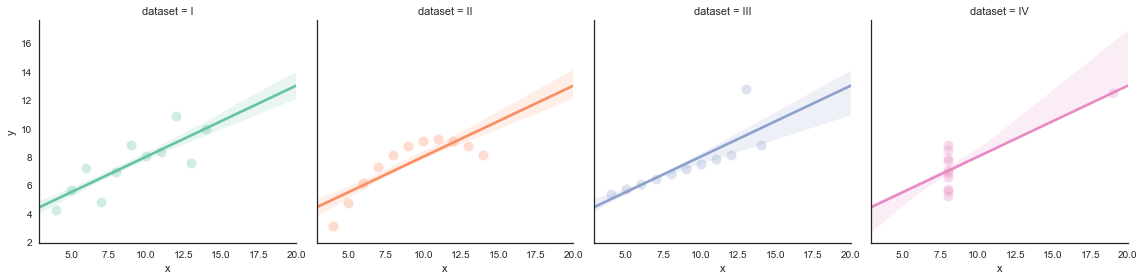

In [6]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", 
           data=anscombe_df, col_wrap=4, ci=50, palette="Set2",
           size=4, scatter_kws={"s": 100, "alpha": 0.3})

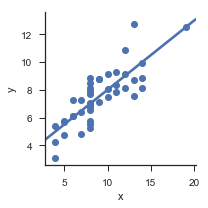

In [7]:
sns.set_style("ticks")
sns.lmplot(x="x", y="y", 
           data=anscombe_df,  ci=None, palette="muted",
           size=3, scatter_kws={"s": 50, "alpha": 1})

In [8]:
# load 吸烟与否数据集
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


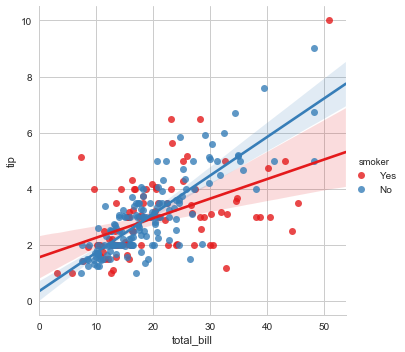

In [9]:
sns.set_style("whitegrid")
#研究小费tips与总消费金额total_bill在吸烟与不吸烟人之间的关系
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,palette="Set1")

通过回归模型发现total_bill=20为分界点，不吸烟者的小费高于吸烟者

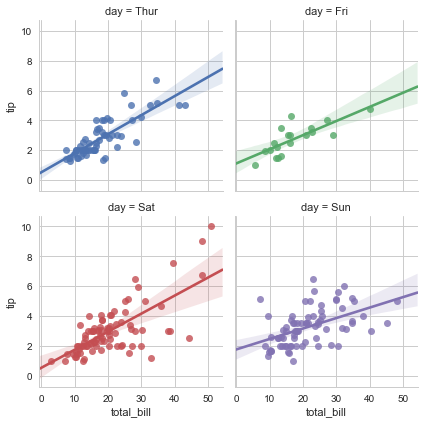

In [10]:
#研究在不同星期下，消费总额与消费的回归关系，col|hue控制子图不同的变量day，col_wrap控制每行子图数量，size控制子图高度
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",data=tips, col_wrap=2, size=3)